
[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    Series1   Series2       Series3         Label
0 -3.141593 -3.141593  1.000000e-10  3.989423e+09
1 -3.141593 -3.141593  8.062423e-03  4.948169e+01
2 -3.141593 -3.141593  1.612485e-02  2.474084e+01
3 -3.141593 -3.141593  2.418727e-02  1.649390e+01
4 -3.141593 -3.141593  3.224969e-02  1.237042e+01


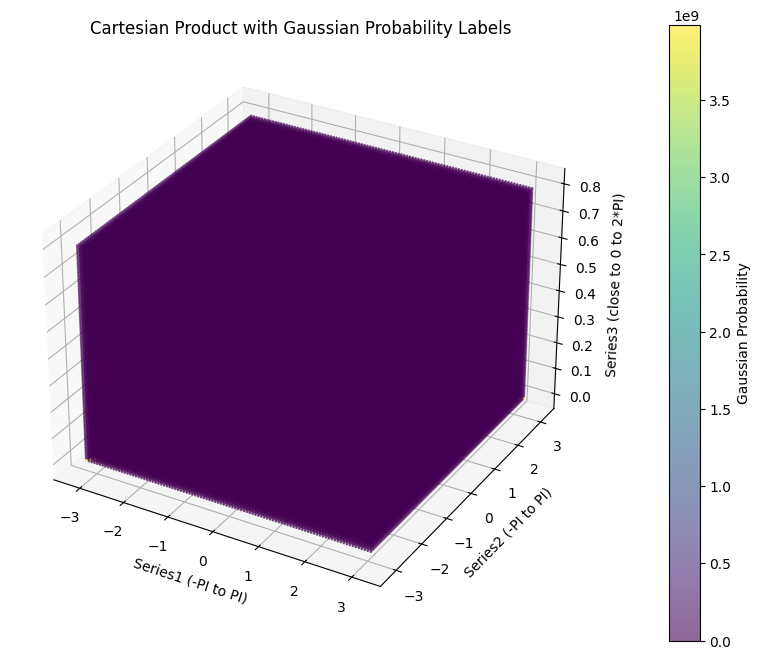

In [19]:
# Install necessary dependencies
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Step 1: Generate the series
num_values = 100

# Series 1: From -PI to +PI
series1 = np.linspace(-np.pi, np.pi, num_values)

# Series 2: From -PI to +PI
series2 = np.linspace(-np.pi, np.pi, num_values)

# Series 3: From a very small number close to 0 to 2*PI
small_number = 1e-10
series3 = np.linspace(small_number, 2 * np.pi, num_values)

# Step 2: Compute the Cartesian product
cartesian_product = list(itertools.product(series1, series2, series3))

# Convert to a pandas DataFrame for better visualization
cartesian_df = pd.DataFrame(cartesian_product, columns=['Series1', 'Series2', 'Series3'])

# Step 3: Compute the labels using the Gaussian probability function
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

cartesian_df['Label'] = cartesian_df.apply(lambda row: gaussian_probability(row['Series1'], row['Series2'], row['Series3']), axis=1)


# Display the first few rows of the DataFrame with labels
print(cartesian_df.head())

# Step 4: Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract Cartesian values for plotting
x = cartesian_df['Series1']
y = cartesian_df['Series2']
z = cartesian_df['Series3']
labels = cartesian_df['Label']

# Scatter plot with color representing the labels
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', s=1, alpha=0.6)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Gaussian Probability')

# Label the axes
ax.set_xlabel('Series1 (-PI to PI)')
ax.set_ylabel('Series2 (-PI to PI)')
ax.set_zlabel('Series3 (close to 0 to 2*PI)')

plt.title('Cartesian Product with Gaussian Probability Labels')
plt.show()


In [20]:
labels

0         3.989423e+09
1         4.948169e+01
2         2.474084e+01
3         1.649390e+01
4         1.237042e+01
              ...     
999995    5.208599e-01
999996    5.154342e-01
999997    5.101205e-01
999998    5.049152e-01
999999    4.998150e-01
Name: Label, Length: 1000000, dtype: float64

In [21]:
labels.describe()

count    1.000000e+06
mean     3.989424e+05
std      3.989225e+07
min      0.000000e+00
25%      2.141578e-25
50%      2.707737e-06
75%      7.535742e-02
max      3.989423e+09
Name: Label, dtype: float64

In [22]:
# Install necessary dependency
!pip install scikit-learn

from sklearn.model_selection import train_test_split
import os

# Step 1: Split the data into an 80/20 train/test set
train_df, test_df = train_test_split(cartesian_df, test_size=0.2, random_state=42, stratify=cartesian_df['Label'])

# Step 2: Save the datasets to files
output_folder = "./"
train_file = os.path.join(output_folder, "train_data2.csv")
test_file = os.path.join(output_folder, "test_data2.csv")

# Save as CSV files
train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

print(f"Train dataset saved to {train_file}")
print(f"Test dataset saved to {test_file}")



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Train dataset saved to ./train_data2.csv
Test dataset saved to ./test_data2.csv


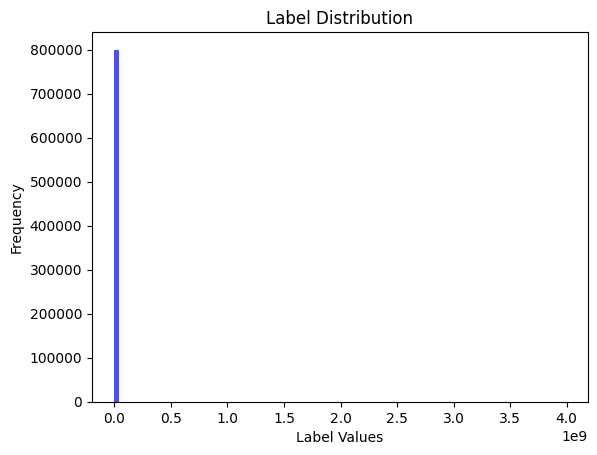

In [23]:
plt.hist(train_df['Label'], bins=100, color='blue', alpha=0.7, label='Train Data')
plt.title('Label Distribution')
plt.xlabel('Label Values')
plt.ylabel('Frequency')
plt.show()

In [36]:
import numpy as np

# Example labels (replace with your actual labels)
labels = train_df['Label']

labels.quantile(0.97)

np.float64(0.9432482584329961)

In [25]:
import numpy as np
import pandas as pd

# Assuming cartesian_df is your DataFrame with 'Label' column
# Step 1: Apply log transformation to the labels (to handle very small values)
log_labels = np.log1p(cartesian_df['Label'])  # log1p to handle values close to 0

log_labels.describe()

count    1.000000e+06
mean     1.061124e-01
std      3.158520e-01
min      0.000000e+00
25%      2.141578e-25
50%      2.707734e-06
75%      7.265309e-02
max      2.210691e+01
Name: Label, dtype: float64

In [26]:
log_labels.quantile(0.9985)

np.float64(1.5699241345343344)

In [27]:
from sklearn.preprocessing import StandardScaler

# Standardize the log-transformed labels
scaler = StandardScaler()
standardized_labels = scaler.fit_transform(log_labels.values.reshape(-1, 1))

# Convert back to a pandas Series for convenience
standardized_labels_series = pd.Series(standardized_labels.flatten())


In [28]:
standardized_labels_series.describe()

count    1.000000e+06
mean     6.639311e-17
std      1.000001e+00
min     -3.359563e-01
25%     -3.359563e-01
50%     -3.359477e-01
75%     -1.059336e-01
max      6.965544e+01
dtype: float64

In [29]:
train_df["Label"].describe()

count    8.000000e+05
mean     3.989424e+05
std      3.989226e+07
min      0.000000e+00
25%      2.068302e-25
50%      2.665754e-06
75%      7.522832e-02
max      3.989423e+09
Name: Label, dtype: float64

In [30]:
# identify outliers
cut_off = train_df["Label"].std() * 3
data_mean = train_df["Label"].mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train_df["Label"].values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in train_df["Label"].values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

outlieres_removed_series = pd.Series(outliers_removed)

Identified outliers: 80
Non-outlier observations: 799920


In [31]:
# now do the same for the outliers removed series
cut_off = outlieres_removed_series.std() * 3
data_mean = outlieres_removed_series.mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in outlieres_removed_series.values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in outlieres_removed_series.values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Identified outliers: 4192
Non-outlier observations: 795728


In [32]:
outliers_removed_series2 = pd.Series(outliers_removed)
outliers_removed_series2.describe()

count    7.957280e+05
mean     1.252767e-01
std      2.802796e-01
min      0.000000e+00
25%      1.054667e-25
50%      2.202389e-06
75%      6.856210e-02
max      2.249168e+00
dtype: float64

(array([5.59718e+05, 2.19760e+04, 1.40430e+04, 1.14750e+04, 8.97900e+03,
        8.05900e+03, 7.29900e+03, 6.80600e+03, 6.06200e+03, 5.82700e+03,
        5.57600e+03, 5.63700e+03, 4.93800e+03, 4.70900e+03, 4.41000e+03,
        5.44200e+03, 6.33200e+03, 2.93300e+03, 6.59700e+03, 4.02400e+03,
        5.81500e+03, 6.01900e+03, 6.57800e+03, 7.47700e+03, 5.73500e+03,
        4.46800e+03, 4.55000e+03, 4.53300e+03, 3.92000e+03, 2.79200e+03,
        2.55800e+03, 2.63100e+03, 2.62900e+03, 3.69100e+03, 1.56200e+03,
        1.48000e+03, 1.25000e+03, 1.55800e+03, 1.32400e+03, 1.63000e+03,
        1.09000e+03, 1.94200e+03, 1.62800e+03, 5.49000e+02, 7.85000e+02,
        7.06000e+02, 8.60000e+02, 5.50000e+02, 5.49000e+02, 6.25000e+02,
        7.04000e+02, 7.04000e+02, 5.50000e+02, 8.59000e+02, 4.68000e+02,
        8.60000e+02, 1.17100e+03, 8.00000e+01, 3.13000e+02, 3.93000e+02,
        1.56000e+02, 2.37000e+02, 3.93000e+02, 3.12000e+02, 2.37000e+02,
        1.56000e+02, 2.37000e+02, 1.56000e+02, 3.93

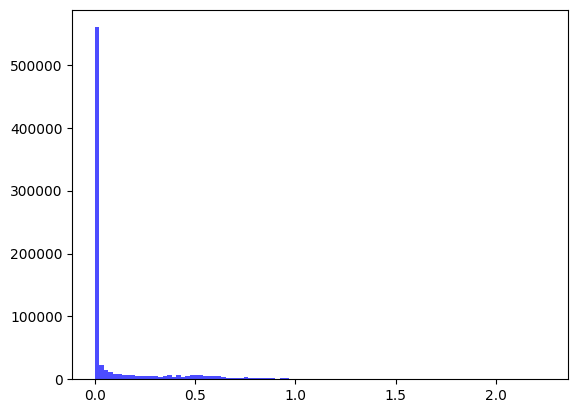

In [33]:
# plot the distribution of the outliers removed series 2
plt.hist(outliers_removed_series2, bins=100, color='blue', alpha=0.7, label='Outliers Removed')